<h1>Analysis of Titanic Data </h1> 

<br>

# 1. Introduction

In this project, we will analyse the Titanic data. A tragic event which occured on April 15, 1912, makes us wonder what factors led to such loss of life, or what groups of people were more likely to survive than others. 
I will try to analyse of what sorts of people were likely to survive, as in, whether women were more likely to survive than men (preference given due to cultural norms), or whether upper-class people had higher survival rate than commoners, etc. <br>
<br>
**Let's find out!**



# 2. Loading of data

We will load the data and see its contents. For that, first we will load few libraries.

In [230]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
import seaborn as sns
import scipy.stats as stats
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [156]:
data = pd.read_csv('titanic_data.csv')
data_clone = data
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


___
<center> As we can see, we have 12 variables. Desciption of these variables are as follows: </center>


 | Variable Name  |Description                        | 
 |:----------------:|:--------------------------:     |
| PassengerId    | Indexing of passenger details     |
| Survived       | Survived (1) or died (0)          | 
| Pclass         | Passenger's class                 |  
| Name           | Passenger's name                  |  
| Sex            | Passenger's sex                   | 
| Age            | Passenger's age                   |  
| SibSp          | Number of Siblings/Spouses Aboard |  
| Parch          | Number of Parents/Children Aboard |
| Ticket         | Passenger's ticket #              |  
| Fare           | Passenger Fare                    |  
| Cabin          | Cabin                             | 
| Embarked       | Port of Embarkation <br> ( Cherbourg(C), Queenstown(Q), Southampton(S) )|




# 3. Filling missing data

As we scroll through data, we see that there are missing data in several columns. Let's first find out which variables have missing values.
<br>

In [157]:
def find_missing(data):
    return data.isnull().any()

print data.apply(find_missing)

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool


As we can see, Age, Cabin and Embarked have missing values. We need to fill these values before going further.
First, we will fill the age column.

In [158]:
def common_title_mr_master(data):
    return data.split(",")[1].split()[0]

#Create a separate column of Title
data['Title'] = data['Name'].apply(common_title_mr_master)

#Look at the types of titles
print data['Title'].unique()


['Mr.' 'Mrs.' 'Miss.' 'Master.' 'Don.' 'Rev.' 'Dr.' 'Mme.' 'Ms.' 'Major.'
 'Lady.' 'Sir.' 'Mlle.' 'Col.' 'Capt.' 'the' 'Jonkheer.']


We can also see that there are other types of titles. So, we want to check which titles are more frequent.

In [159]:
pd.crosstab(data.Sex,data.Title)

Title,Capt.,Col.,Don.,Dr.,Jonkheer.,Lady.,Major.,Master.,Miss.,Mlle.,Mme.,Mr.,Mrs.,Ms.,Rev.,Sir.,the
Sex,,,,,,,,,,,,,,,,,
female,0,0,0,1,0,1,0,0,182,2,1,0,125,1,0,0,1
male,1,2,1,6,1,0,2,40,0,0,0,517,0,0,6,1,0


We observe that titles Mr., Mrs. , Master. and Miss. are most common. So, we will rename Mlle/Ms as Miss, Mme as Mrs and others as Rare Title.

In [160]:
def replace_title(data):
    if (data == 'Mlle.' or data == 'Ms.'):
        data = 'Miss.'
    elif (data == 'Mme'):
        data = 'Mrs.'
    elif data not in ['Mr.','Mrs.','Master.','Miss.']:
        data = 'Rare Title'
    return data

data['Title'] = data['Title'].apply(replace_title)

Now, we will replace the age NaN values by their categorical median value, and merge into a new table

In [161]:

def fill_age(data, title):
    sub_data = data[data['Title']==title]
    sub_data['Age'].fillna(sub_data['Age'].median(), inplace=True)
    return sub_data

master = fill_age(data,'Master.')
mr =  fill_age(data,'Mr.')
mrs = fill_age(data,'Mrs.')
miss =  fill_age(data,'Miss.')
rare = fill_age(data,'Rare Title')

data = master.append(mr).append(mrs).append(miss).append(rare).sort_values(by='PassengerId', ascending=1)

After taking care of age, we should take care of cabin.

In [162]:
print len(data) - data['Cabin'].isnull().sum()

204


Only 204 passengers have cabin entry. Rest of them have no entry at all !! As this column is sparse, it's better if we leave this column as it is. Or, fill it with NA string, as I've done below. 

In [163]:
data.update(data['Cabin'].fillna('NA'))

At last, we need to handle Embarked variable.

In [164]:
print data['Embarked'].isnull().sum()

2


As there's only two missing values, we can replace them. Let's see those data points first.

In [165]:
data[data['Embarked'].isnull()==True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Miss.
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Mrs.


We notice that both passengers belonged to 1st class, both had fare of $80, and same cabin. So from where did they embark? To find this, first exclude this 2 data points from the rest of data. And then, I'll find the median fare of 1st class passenger w.r.t each embarkment point. 

In [166]:
remaining_passengers = data[data['PassengerId'] != 62 ]
remaining_passengers = remaining_passengers[remaining_passengers['PassengerId'] != 830 ]

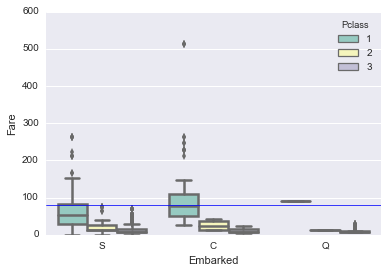

In [167]:
def plot_boxplot(data, x_var, y_var, categories, y_intercept):
    sns.boxplot(x=x_var, y=y_var, hue=categories, data=data,  palette="Set3", linewidth=2.5)
    plt.axhline(y=y_intercept, linewidth=0.75)

plot_boxplot(remaining_passengers,"Embarked","Fare","Pclass",80)

Hmm. It seems that the median fare of 1st class passengers from Charbourg(C) coincides with the fare paid by the two passengers whose Embarkment is missing. So, we will replace the missing value with C.

In [168]:
data.update(data['Embarked'].fillna('C'))

Now we have dealt with missing data, let's start the analysis part.<br>

# 4. Data Analysis

**First of all, let us see the frequency of people who survived and who didn't survive.**

People survived (1) : 342
People didn't survive (0) : 549


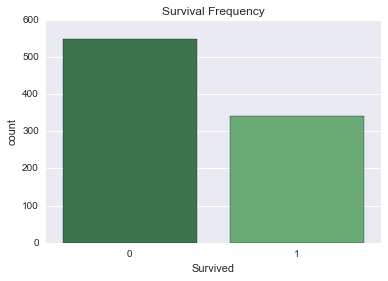

In [169]:
def freq_count(data, variable, condition):
    return len(data[data[variable]==condition])

def count_plot(data,variable,title):
    sns.countplot(x=variable, data=data, palette="Greens_d")
    plt.title(title)

print "People survived (1) :", freq_count(data, "Survived", 1)
print "People didn't survive (0) :", freq_count(data, "Survived", 0)


count_plot(data, "Survived", "Survival Frequency")

**Frequency of passengers by socio-economic class**

No. of 1st class passengers: 216
No. of 2nd class passengers: 184
No. of 3nd class passengers: 491


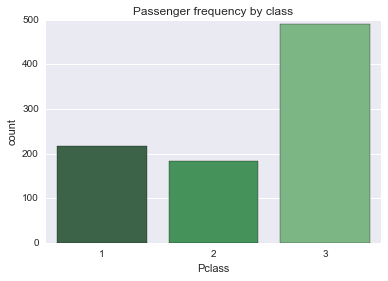

In [170]:
print "No. of 1st class passengers:", freq_count(data, "Pclass", 1)
print "No. of 2nd class passengers:", freq_count(data, "Pclass", 2)
print "No. of 3nd class passengers:", freq_count(data, "Pclass", 3)

count_plot(data, "Pclass", "Passenger frequency by class")

Now, let's create a new variable called **family_size** to know the number of family members travelling along the person.

In [171]:
def family_size(data):
    a = []
    for i in range(len(data)):
        a.append(1 + data['SibSp'][i] + data['Parch'][i]) 
    return a

data['family_size'] = family_size(data)

**Let's look at the distribution of family size**

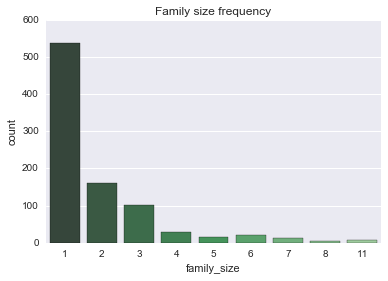

In [172]:
count_plot(data, "family_size", "Family size frequency")

**Let us explore the age distribution of people who survived and who didn't survive.**

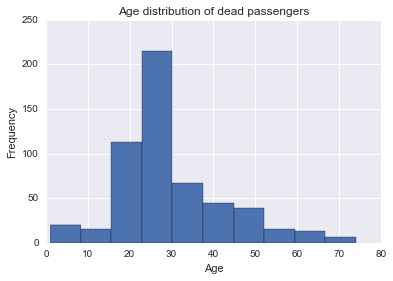

In [173]:
def hist_plot(data, title, xtitle):
    plt.title(title)
    plt.xlabel(xtitle)
    plt.ylabel("Frequency")
    plt.hist(data, histtype='bar', stacked=True, fill=True)
    
hist_plot(data[data['Survived']==0]['Age'], "Age distribution of dead passengers", "Age")

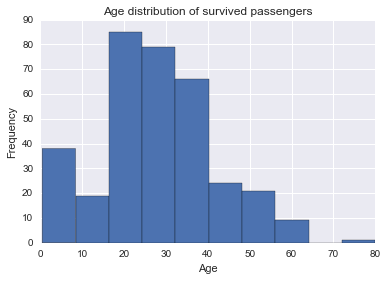

In [174]:
hist_plot(data[data['Survived']==1]['Age'], "Age distribution of survived passengers", "Age")

** Let's jump to questions related to survival. Whether female passengers had better survival rate than male passengers? Let's find out.**

In [175]:
pd.crosstab(data.Sex, data.Survived).apply(lambda r: r/r.sum(), axis=1)

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


We can observe that female passengers had better survival rate (74%) than male passengers (~19%). This is also apparent from the mosaic plot shown below.

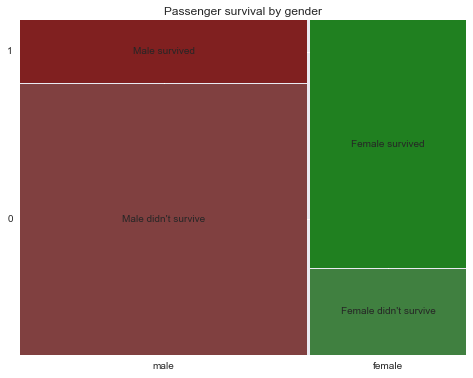

In [176]:
def plot_mosaic(data, variables, title, label, size):
    plt.rcParams['font.size'] = 12.0
    plt.rcParams["figure.figsize"] = size
    mosaic(data, variables, title=title, labelizer=label)

labelizer_gender = lambda k: {('female','0'): "Female didn't survive", 
                       ('male','0'): "Male didn't survive",
                       ('female','1'): 'Female survived', 
                       ('male','1'): 'Male survived'}[k]

plot_mosaic(data, ['Sex','Survived'], 'Passenger survival by gender',labelizer_gender, [8,6] )

But, we should be more confident of the assumptions that we have made. For that, we will perform chi-squared test of independence tests.

In [236]:
observed = pd.crosstab(data.Sex, data.Survived)
stats.chi2_contingency(observed=observed)

(260.71702016732104,
 1.1973570627755645e-58,
 1,
 array([[ 193.47474747,  120.52525253],
        [ 355.52525253,  221.47474747]]))

Given the chi-square statistic of 260.71 and extermely low p-value (tending to 0 and certainly less than significance level (0.005)), it shows a strong relationship between Gender and Survival.

**Did passengers in higher socio-economic class had higher survival rates compared with lower classes? Let's check out.**

In [177]:
pd.crosstab(data.Pclass, data.Survived).apply(lambda r: r/r.sum(), axis=1)

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


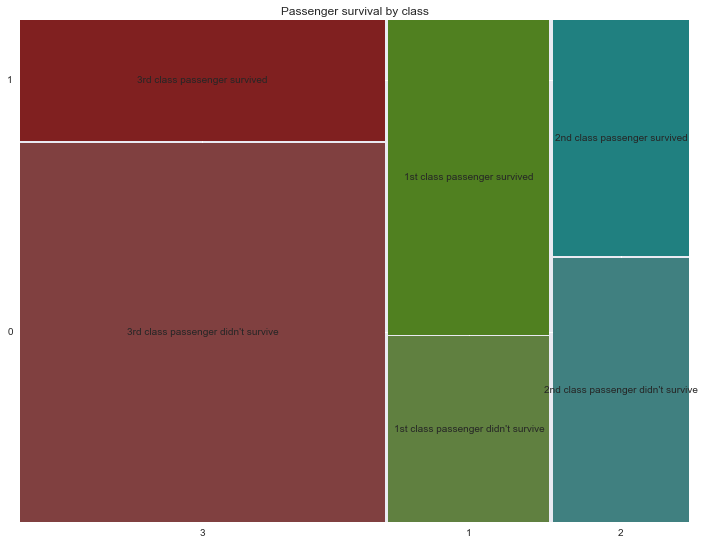

In [178]:
labelizer_class = lambda k: {('1','0'): "1st class passenger didn't survive", 
                       ('1','1'): "1st class passenger survived",
                       ('2','0'): "2nd class passenger didn't survive", 
                       ('2','1'): "2nd class passenger survived",
                       ('3','0'): "3rd class passenger didn't survive", 
                       ('3','1'): "3rd class passenger survived"}[k]

plot_mosaic(data, ['Pclass','Survived'], 'Passenger survival by class',labelizer_class, [12,9] )

We can observe that 1st class passengers had better survival rate (63%) than other classes. This is also apparent from the mosaic plot shown above.

We should be more confident of the assumptions that we have made here as well. For that, we will perform chi-squared test of independence tests.

In [241]:
observed = pd.crosstab(data.Pclass, data.Survived)
stats.chi2_contingency(observed=observed)

(102.88898875696056,
 4.5492517112987927e-23,
 2,
 array([[ 133.09090909,   82.90909091],
        [ 113.37373737,   70.62626263],
        [ 302.53535354,  188.46464646]]))

Given the chi-square statistic of 102.89 and extermely low p-value (tending to 0 and certainly less than significance level (0.005)), it shows a strong relationship between Passenger class and Survival.

**Next, we want to see whether female passengers who embarked from Southampton, traveling in first class were more likely to survive than their male counterparts**

In [179]:
def first_southampton(data):
    a = data[data['Embarked']=="S"]
    a = a[a['Pclass']==1]
    return a

southampton = first_southampton(data)

pd.crosstab(southampton.Sex, southampton.Survived).apply(lambda r: r/r.sum(), axis=1)

Survived,0,1
Sex,,
female,0.041667,0.958333
male,0.645570,0.354430


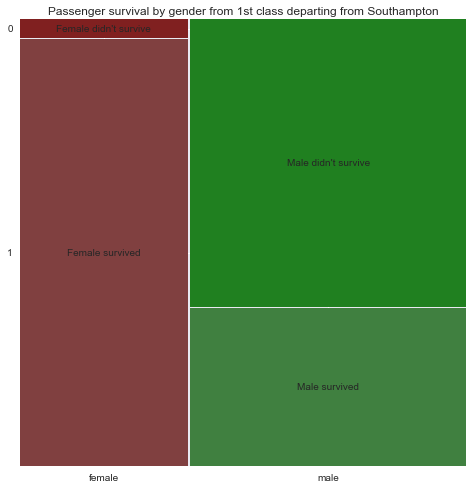

In [180]:
plot_mosaic(southampton, ['Sex','Survived'], 'Passenger survival by gender from 1st class departing from Southampton',labelizer_gender, [8,8] )

We can observe that female passengers had better survival rate (95%) than their male counterpart. This is also apparent from the mosaic plot shown above.

We will perform chi-squared test of independence tests, to see whether the assumption of relation between gender and survival under certain socio-economic condition is valid or not.

In [242]:
observed = pd.crosstab(southampton.Sex, southampton.Survived)
stats.chi2_contingency(observed=observed)

(42.332430290856294,
 7.7005012885879317e-11,
 1,
 array([[ 20.03149606,  27.96850394],
        [ 32.96850394,  46.03149606]]))

Given the chi-square statistic of 42.33 and extermely low p-value (tending to 0 and certainly less than significance level (0.005) ), it shows a strong relationship between gender and survival under certain socio-economic condition.

**Do families sink or swim together?**

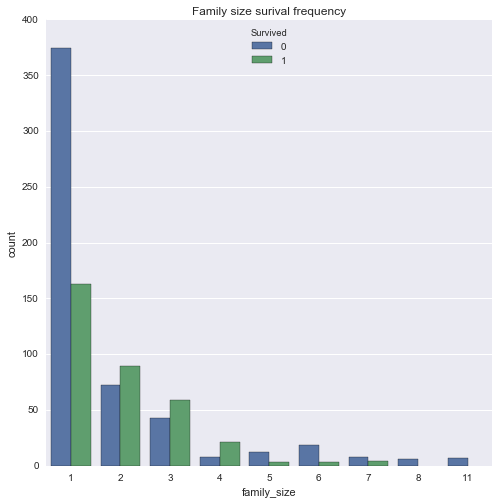

In [181]:
def family_survival():
    sns.countplot(x="family_size", hue="Survived", data=data)
    plt.title("Family size surival frequency")

family_survival()

This is interesting. We observe that family sizes of 2 to 4 have better survival rates than singles and larger family size.

# 5. Conclusion

Based on the above analysis, we can make the following conclusions:

* Females in general had better survival rates than males, as women are generally given first preference when it comes to save lives.
* Socio-economic factor played a huge role in survival, as we can see survival rate decreased along with decrease in passenger class. Rich people were given more preference to save their lives.
* Smaller family size had better survival rate than larger ones.

However, there are several limitations to the kind of analysis I have made. 

First of all, I have replaced the missing values in the age group with the median of age w.r.t titles. **However, it's not a perfect solution. We will see how.**



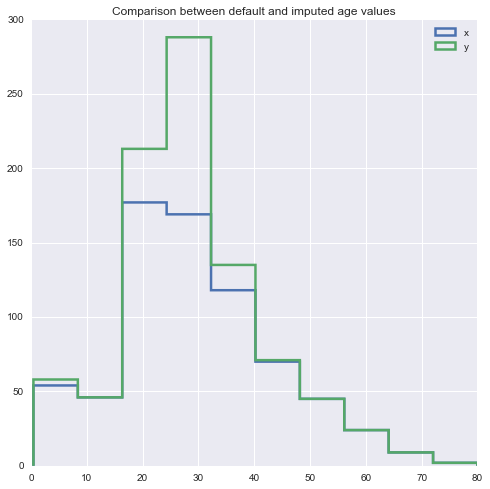

In [203]:
def show_median_plot_bias():
    plt.hist(data_clone['Age'].dropna(), 10, label='x', histtype='step', stacked=True, fill=False, linewidth=2.5)
    plt.hist(data['Age'], 10, label='y', histtype='step', stacked=True, fill=False, linewidth=2.5)
    plt.legend(loc='upper right')
    plt.title("Comparison between default and imputed age values")
show_median_plot_bias()

As we can see, the median values is extremely over-represented for age-group (~16-40). This misrepresents the overall distribution of the variable and impede our statistical analyses to some extent.

I have also filled the null values in cabin with 'NA' string. Actually, we shouldn't do it. Because, given it's sparse data distribution, we should keep the null values as it is. What if we train an ensemble model (like Random Forest) with 'NA' string and in the test data, the cabin variable consist of null values ? We should try to learn the predictive model adapting according to the null values.

# 6. References

1. https://web.stanford.edu/~mwaskom/software/seaborn/
2. https://stackoverflow.com